In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.fasttext import load_facebook_vectors
from scipy.cluster import hierarchy

In [11]:
# load facebook vectors
word_vec = load_facebook_vectors("../data/crawl-300d-2M-subword.bin")

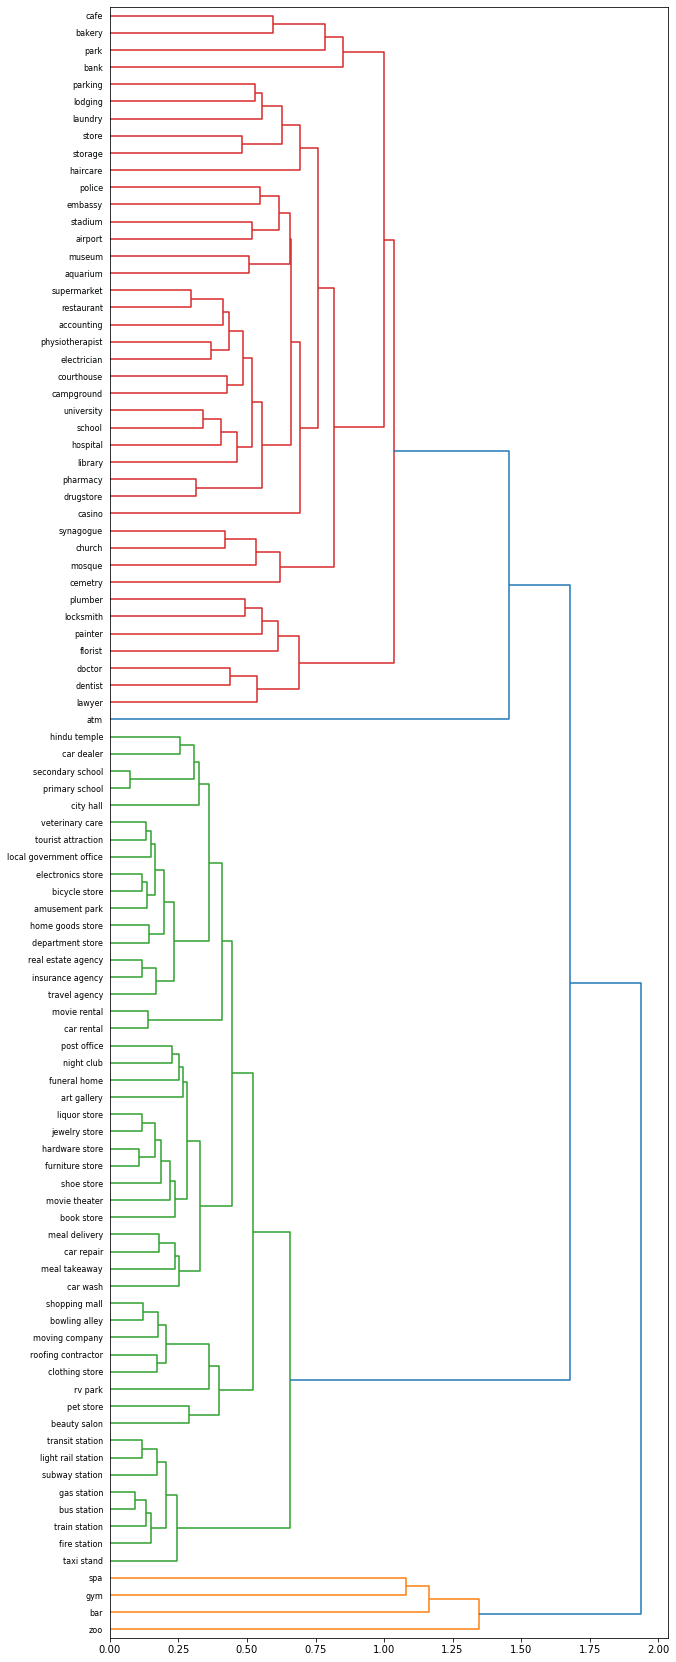

In [80]:
# prepare data for clustering
placetype_mapping = pd.read_excel('../data/mappings/placetype_mapping.xlsx')
google_placetype = placetype_mapping['OriginalPlaceType'].tolist()
google_placetype = [placetype.replace('_', ' ') for placetype in google_placetype]

google_df = pd.DataFrame(google_placetype, columns=['placetype'])
vectors = np.zeros((len(google_placetype), 300))

for i in range(len(google_df)):
    vectors[i, :] = word_vec[google_df.loc[i, 'placetype']]

google_df = pd.concat([google_df, pd.DataFrame(vectors)], axis=1)
google_df.set_index('placetype', inplace=True)

In [ ]:
# plot dendrogram
Z = hierarchy.linkage(google_df, 'ward')
plt.figure(figsize=(10,30))
dn = hierarchy.dendrogram(Z, orientation='right',
                          leaf_font_size=8, labels=google_df.index)
